# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

### Открытие файла и выгрузка библиотек

Откроем файл и загрузим нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Первичный осмотр данных

Осмотрим данные, вызовем метод info для выявления пропусков, и проверим соответствуют ли типы данных данным в колонках

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Мы видим большое количество пропусков в колонках, а так же несоответствие типов данных, таких как is_apartment, где вместо bool стоит тип object.

Распечатем таблицу и посмотрим на данные

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Сразу бросается в глаза тип данных float там, где его не должно быть, например, в колонках с ценой или общим кол-вом этажей.

Вызовем метод describe для дополнительного поиска ошибок

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Мы видим, что в колонке rooms у нас есть значения равные нулю. В колонке ceiling_height есть минимальные значения равные 1 метру, а максимальные 100. В столбце living_area минимальное значение 2м, а в kitchen_area 1.3. Также наличие более 2х балконов вызывает подозрение. Расстояние до аэропорта в 0 метров тоже не очень правдоподобно.

### Вывод

В результате первичного осмотра данных, мы нашли в них пропуски, которые имеют различную природу. Выявили несоответствие типов данных, а также аномальные значения в колонках. Эта информация поможет нам при дальнейшей обработке данных.

## Предобработка данных

### Определение пропущенных значений

Охарактеризуем пропуски в колонках


Пропуски в колонках указаных ниже скорее всего вызваны ошибкой при вводе данных:
* **ceiling_height**
* **floors_total**
* **living_area**
* **locality_name** 


* **is_apartment** - а вот здесь уже ошибка в типе данных т.к. эта колонка должна содержать булев тип данных, а содержит строки 
* **kitchen_area** - здесь может быть ошибка при вводе, а так же, влададельцы студий у которых нет отдельной площади кухни
* **balcony** - здесь пропуски скорее всего связаны с отсутствием балконов в квартирах 


Следующие данные не зависят от ввода пользователя и записаны автоматически. Возможно пропуски возникли из за того, что часть данных собрана с населенных пунктов не имеющих данных показателей. А пропуски в days_exposition скорее всего вызваны техическими причинами(ошибкой в записи или передаче данных).
* **airports_nearest** 
* **cityCenters_nearest** 
* **parks_around3000** 
* **parks_nearest** 
* **ponds_around3000** 
* **ponds_nearest** 
* **days_exposition** 

Из тех пропусков что мы имеем, можно заменить пустые значения в колонках с балконами, парками, водоемами в пределах 3000м и в колонке is_apartment.

### Замена пропущенных значений

Заменим пропущенные значения в колонке с балконами на 0 методом fillna

In [5]:
# для этого создадим функцию которая принимает датафрейм и список столбцов к которым применять изменения
def fillna_0(data, list_range):
    for i in list_range:
        data[i] = data[i].fillna(0)
    
fillna_0(df, ['balcony', 'parks_around3000', 'ponds_around3000'])    
    

Заменим пропуски в is_apartment на False методом fillna

In [6]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [7]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Заменим пропуски в колонках с жилой площадью и площадью кухни

In [8]:
gb = df.groupby(['total_area','rooms'])

for i in ['living_area', 'kitchen_area']:
    df[i] = round(df[i].fillna(
    gb[i].transform(lambda group: group.mean() / (group.name[0])) * df['total_area']), 2)


Проверим изменения методом info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23487 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23278 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

### Изменение типов данных

Найдем несоответствия с помощью метода info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23487 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23278 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Заменим тип данных на цельночисленный в колонках:
* last_price 
* floors_total
* balcony
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition

In [11]:
# создадим список с названиями колонок
astype_col = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']  
# создадим цикл для изменения типа данных в нужных стоблцах
for i in astype_col:
    df[i] = df[i].astype('float32').astype('Int64')
        

Проверим результат

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null Int64
living_area             23487 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23278 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        23699 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000        23699 

Теперь поменяем тип данных в столбце с датой 

In [13]:
# применим метод to_datetime к столбцу first_day_exposition
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
# проверим результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,NaN,14,54.0,9,False,...,15.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


### Вывод

В ходе предобработки данных, мы определили пропущенные значения и произвели замену, там где это логически возможно. 
Заменили типы данных, тем самым подготовив их для дальнейшего анализа.

## Расчёты и добавление результатов в таблицу

### Расчет цены за квадратный метр

Посчитаем цену квадратного метра, для этого разделим столбец last_price на total_area

In [14]:
df['meter_price'] = (round(df['last_price'] / df['total_area'])).astype(int)
# проверим результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,82921
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786
3,0,64900000,159.0,2015-07-24,3,NaN,14,54.0,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


### Добавление данных о дне недели, месяце и годе публикации обьявления

Добавим в таблицу данные: о дне недели, месяце и годе публикации обьявления

In [15]:
# создадим колонки с данными о времени и помести в них данные с помошью атрибута dt
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
# посмотрим на результат 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028,1,482,2,755,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603,0,NaN,0,NaN,81,82921,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933,1,90,2,574,558,92786,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,54.0,9,False,...,6800,2,84,3,234,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098,2,112,1,48,121,100000,1,6,2018


### Категоризация до дынным об этаже

Категоризируем данные о этаже квартиры. Добавим варианты первый, последний и другой 

In [16]:
# создадим функцию для деления на категории
def floor(row):
    max_floor = row['floors_total']
    
    if pd.isna(max_floor): return None
    
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == max_floor:
        return 'последний'
    else:
        return 'другой'

# применим функцию к датафрейму с помошью apply
df['floor_category'] = df.apply(floor, axis=1)
# проверим результат с помошью value_counts
df['floor_category'].value_counts()

другой       17363
последний     3336
первый        2914
Name: floor_category, dtype: int64

### Расчет соотношения жилой и кухонной площади к общей

Посчитаем соотношение в процентах жилой и общей площади, а также отношение площади кухни к общей.

In [17]:
# поделим жилую площадь на общую и умножи на 100, округлим получившееся значение
df['ratio_living'] = round(df['living_area'] / df['total_area'] * 100, 1)
# сделаем тоже самое для кухни
df['ratio_kitchen'] = round(df['kitchen_area'] / df['total_area'] * 100, 1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday,month,year,floor_category,ratio_living,ratio_kitchen
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370,3,3,2019,другой,47.2,23.1
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,NaN,81,82921,1,12,2018,первый,46.0,27.2
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2,574,558,92786,3,8,2015,другой,61.2,14.8
3,0,64900000,159.0,2015-07-24,3,NaN,14,54.0,9,False,...,3,234,424,408176,4,7,2015,другой,34.0,9.4
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,100000,1,6,2018,другой,32.0,41.0


### Вывод

Мы посчитали и добавили различные параметры которые категоризируют данные, а так же предоставляю дополнительную информацию.
Все это поможет для дальнешего иследования данных.

## Исследовательский анализ данных

### Иследование площади, цены, числа комнат и высоты потолков

Вызовем метод describe и построим гистограму для более детального изучения

#### Изучим данные о площади квартиры

In [18]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Text(0, 0.5, 'Частота')

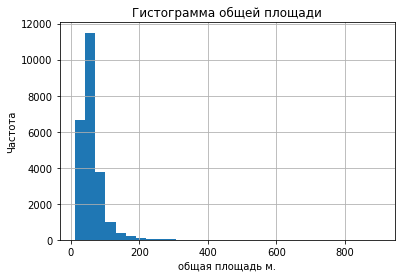

In [19]:
df.hist('total_area', bins=30)
plt.title('Гистограмма общей площади')
plt.xlabel('общая площадь м.')
plt.ylabel('Частота')

Мы видим что 75% квартир площадью до 69 метров, а на гистограмме видно, что большая чать данных находится в диапозоне от 12 до 200 метров. Обрежем хвост и взглянем на данные поближе

Text(0, 0.5, 'Частота')

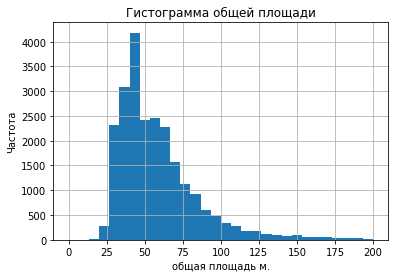

In [20]:
df.hist('total_area', bins=30, range=(0, 200))
plt.title('Гистограмма общей площади')
plt.xlabel('общая площадь м.')
plt.ylabel('Частота')

Мы видим ярко выраженную моду около 45 метров

#### Изучим данные о стоимости жилья

In [21]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Не очень удобное представление данных, переведем руббли в миллионы и сохраним в столбец last_price_m

In [22]:
df['last_price_m'] = df['last_price'] /1000000
df['last_price_m'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_m, dtype: float64

 Мы видим большой размах данных. Минимальное значение в 12 тысяч и максимальное в 763 миллиона. При этом 75 процентов находится в диапозоне до 7 миллионов. Высокие значения сильно влияют на среднее, оно на треть больше медианы, а среднее отклонение в два раза больше среднего.
 
 Построим гистограму и посмотрим на размах

Text(0, 0.5, 'Частота')

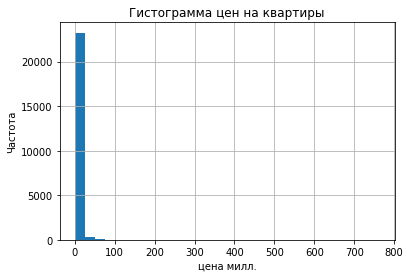

In [23]:
df.hist('last_price_m', bins=30)
plt.title('Гистограмма цен на квартиры')
plt.xlabel('цена милл.')
plt.ylabel('Частота')

Большинство данных укладываются до 100 млн. Сделаем срез от 1 млн до 100 млн

Text(0, 0.5, 'Частота')

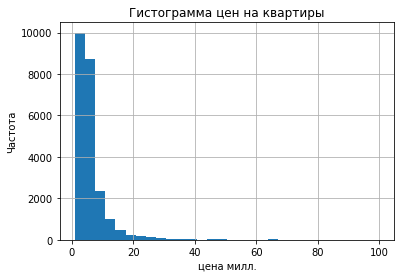

In [24]:
df.hist('last_price_m', bins=30, range=(1, 100))
plt.title('Гистограмма цен на квартиры')
plt.xlabel('цена милл.')
plt.ylabel('Частота')

Мы опять видим, что основная часть данных до 40 млн, а после редкие выбросы. Обрежем еще до 40ка.

Text(0, 0.5, 'Частота')

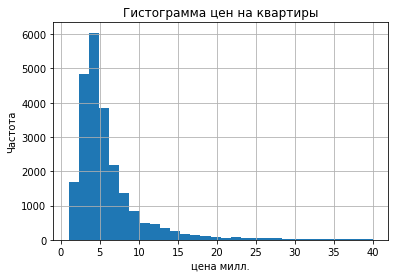

In [25]:
df.hist('last_price_m', bins=30, range=(1, 40))
plt.title('Гистограмма цен на квартиры')
plt.xlabel('цена милл.')
plt.ylabel('Частота')

Теперь мы видим распределение с модой около 4.5 млн и длинным хвостом.

#### Изучим данные о комнатах

In [26]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Мы так же видим значения без комнат(возможно студии) и аномально большие значения, но в этот раз они не сильно влияют на среднне. Построим гистограмму и посмотрим распределение

Text(0, 0.5, 'частота')

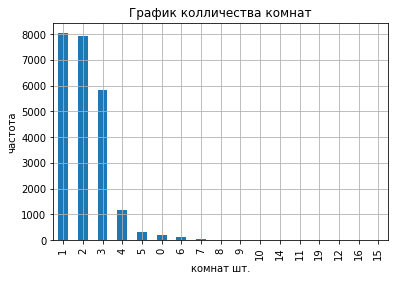

In [27]:
(
    df['rooms'].value_counts()
    .plot(grid=True, kind='bar')
)
plt.title('График колличества комнат')
plt.xlabel('комнат шт.')
plt.ylabel('частота')

Почти все значения укладываются до 9 и мы видим 2 моды на одномнатные и двухкомнытные квартиры

#### Изучим данные о высоте потолков

In [28]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Потолки высотой в 1 и в 100 метров смотрятся неправдоподобно, сделаем срез от 2 до 5 метров и посмотрим на гистограмму

Text(0, 0.5, 'Частота')

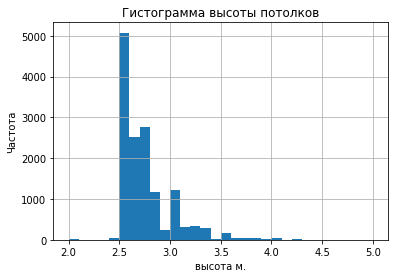

In [29]:
df.hist('ceiling_height', bins=30, range=(2, 5))
plt.title('Гистограмма высоты потолков')
plt.xlabel('высота м.')
plt.ylabel('Частота')

Мы видим у большой части квартир высота потолка от 2.5 до 4.5 метров. Значения выше и ниже встречаются на порядок меньше.

### Иследование времени продажи квартиры

In [30]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Мы видим что самое долгое обьявление висело больше 4х лет и такие высокие значения сильно повлияли на среднее значение, оно в 2 раза больше медианы. Построим гистограмму

Text(0, 0.5, 'Частота')

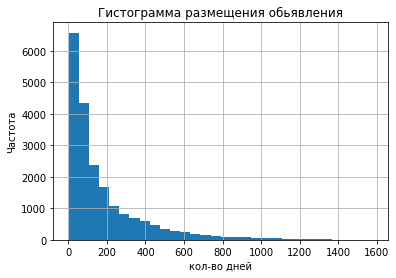

In [31]:
df.hist('days_exposition', bins=30)
plt.title('Гистограмма размещения обьявления')
plt.xlabel('кол-во дней')
plt.ylabel('Частота')

На гистограмме есть большой пик около нуля, поставим размах в 30 дней и найдем редкие значения

Text(0, 0.5, 'Частота')

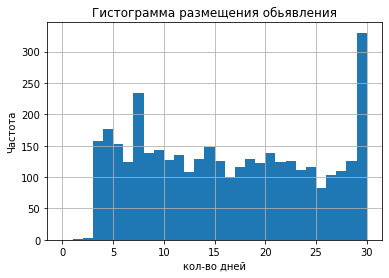

In [32]:
df.hist('days_exposition', bins=30, range=(0, 30))
plt.title('Гистограмма размещения обьявления')
plt.xlabel('кол-во дней')
plt.ylabel('Частота')

Мы видим что основные продажи квартир начинаются с третьего дня, остальные значения можно назвать аномальными 

Найдем большие и редкие значения, для этого постороим график box plot

<function matplotlib.pyplot.show(*args, **kw)>

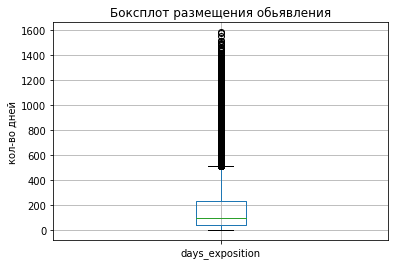

In [33]:
# вызовем метод boxplot библиотеки matplotlib
df.boxplot('days_exposition')
plt.title('Боксплот размещения обьявления')
plt.ylabel('кол-во дней')
plt.show

На графике видно, что аномальные значения появляются после 500 дней. Можно сказать что основные продажи происходят от 3 дней до полутора лет, а остальные зачения являются аномально быстрыми и аномально долгими.

Построим срез на получившихся данных

Text(0, 0.5, 'Частота')

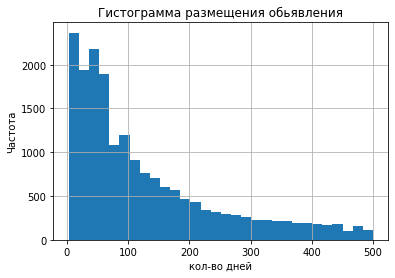

In [34]:
df.hist('days_exposition', bins=30, range=(3, 500))
plt.title('Гистограмма размещения обьявления')
plt.xlabel('кол-во дней')
plt.ylabel('Частота')

Мы видим выделяющиеся пики в диапозоне значений до 100 дней.

Приблизим значения и посмотрим что там происходит

Text(0, 0.5, 'Частота')

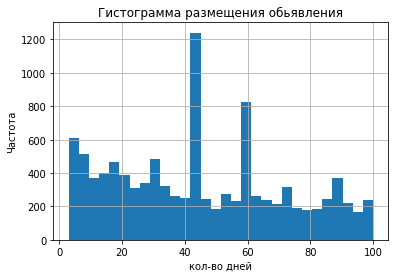

In [35]:
df.hist('days_exposition', bins=30, range=(3, 100))
plt.title('Гистограмма размещения обьявления')
plt.xlabel('кол-во дней')
plt.ylabel('Частота')

Мы видим 2 выброса на значениях 45 и 60. Скорее всего это ограничения сервиса после которых снимается обьявление, либо это работа автоматезированых сервисов(возможно ботов)

Избавимся от этих значений с помощью метода query

Text(0, 0.5, 'Частота')

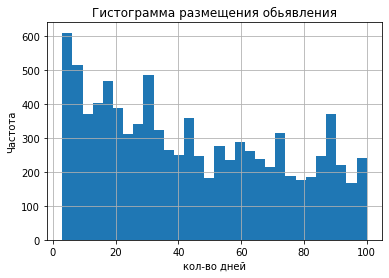

In [36]:
df.query('days_exposition != [45, 60]').hist('days_exposition', bins=30, range=(3, 100))
plt.title('Гистограмма размещения обьявления')
plt.xlabel('кол-во дней')
plt.ylabel('Частота')

Теперь распределение выглядит нормально. Отдалимся обратно и посмотрим как выглядит распределение

Text(0, 0.5, 'Частота')

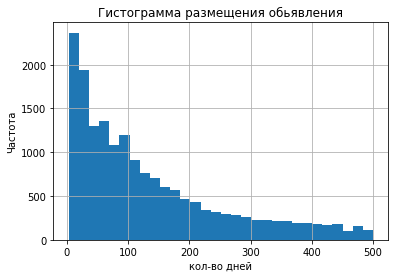

In [37]:
df.query('days_exposition != [45, 60]').hist('days_exposition', bins=30, range=(3, 500))
plt.title('Гистограмма размещения обьявления')
plt.xlabel('кол-во дней')
plt.ylabel('Частота')

Теперь мы можем сказать, что обычно квартиры продаются в диапозоне от 3 до 500 дней. Чаще всего квартиры продаются в первый месяц, а с течением времени вероятность уменьшается.

### Иследование факторов влияющих на стоимость квартиры

#### Проверим зависит ли цена от площади

Создадим переменную с данными без аномалий

In [38]:
df_tl = df.query('12 < total_area < 200 and 1 < last_price_m < 40')

Создадим диаграмму рассеяния 

Text(0, 0.5, 'цена милл.')

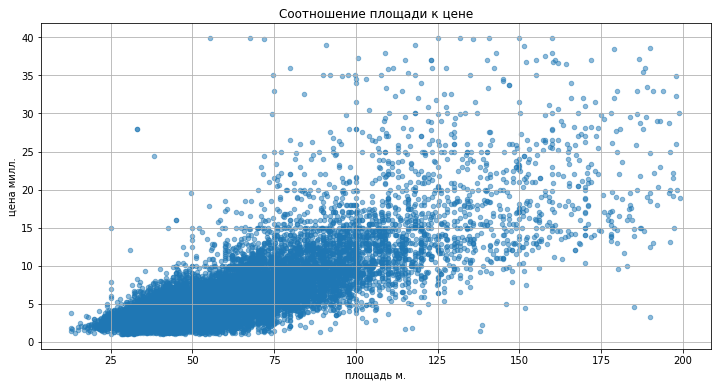

In [39]:
df_tl.plot(
    x='total_area',
    y='last_price_m',
    kind='scatter',
    grid=True,
    figsize=(12, 6),
    alpha=0.5
)
plt.title('Соотношение площади к цене')
plt.xlabel('площадь м.')
plt.ylabel('цена милл.')

На графике видно, что цены растут всместе в слощадью квартиры, а после 75 метров начинается сильный разброс цен

Найдем коэффициент корреляции

In [40]:
df_tl['total_area'].corr(df_tl['last_price_m'])


0.7757617204755936

Коэффициент показывает что взаимосвязь имеется

#### Проверим зависит ли цена от кол-ва комнат

Создадим переменную с данными без аномалий

In [41]:
df_rl = df.query('rooms < 9 and 1 < last_price_m < 40')

Сгрупируем данные по комнатам и постоим график по медианным значениям

Text(0, 0.5, 'цена милл.')

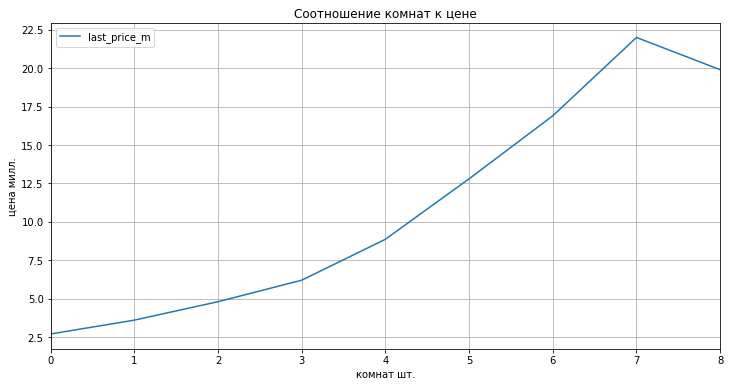

In [42]:
(
    df_rl.pivot_table(index='rooms', values='last_price_m', aggfunc='median')
    .plot(grid=True,figsize=(12, 6))
)
plt.title('Соотношение комнат к цене')
plt.xlabel('комнат шт.')
plt.ylabel('цена милл.')

На графике видно, что с ростом комнат растет и стоимость квартиры. При этом после 7 комнат график идет вниз

Посчитаем коэффициент корреляции

#### Проверим зависит ли цена от удаленности от центра

Создадим переменную без аномалий

In [43]:
df_l = df.query('1 < last_price_m < 40')

Построим диаграмму рассеяния

Text(0, 0.5, 'цена милл.')

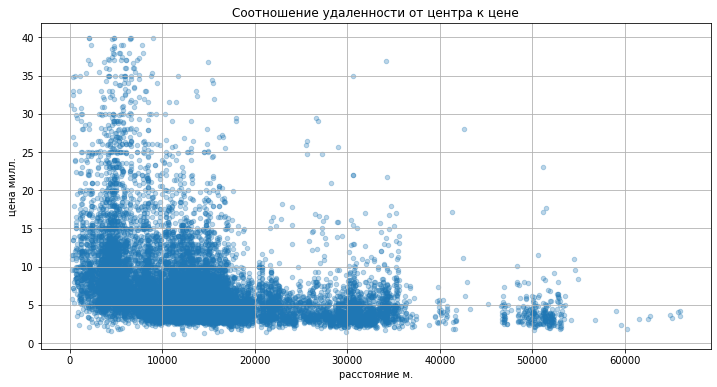

In [44]:
df_l.plot(
    x='cityCenters_nearest',
    y='last_price_m',
    kind='scatter',
    grid=True,
    figsize=(12, 6),
    alpha=0.3
)
plt.title('Соотношение удаленности от центра к цене')
plt.xlabel('расстояние м.')
plt.ylabel('цена милл.')

На графике видно, что после отметки в 20000 идет резкий рост верхней границы графика(появляется больше дорогих квартир), а нижняя граница начинает свой рост только после отметки в 10000

#### Изучим зависимость цены от этажа 

Построим столбчатый график с медианной ценой по каждой категории, переменную возьмем из прошлого шага

Text(0, 0.5, 'цена милл.')

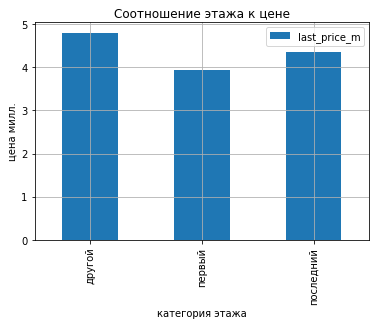

In [45]:
(
    df_l.pivot_table(index='floor_category', values='last_price_m', aggfunc='median')
    .plot(grid=True, kind='bar', y='last_price_m')
)
plt.title('Соотношение этажа к цене')
plt.xlabel('категория этажа')
plt.ylabel('цена милл.')

Мы видим, что квартиры на 1 этаже в среднем дешевле чем на остальных, а дороже всего квартиры посередине

#### Изучим зависимость от даты размещения обьявления

**Изучим зависимость от дня недели**

Построим линейный график от понедельника до воскресенья

Text(0, 0.5, 'цена милл.')

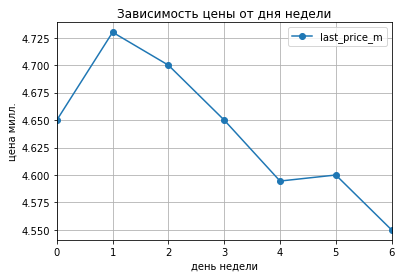

In [46]:
(
    df_l.pivot_table(index='weekday', values='last_price_m', aggfunc='median')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость цены от дня недели')
plt.xlabel('день недели')
plt.ylabel('цена милл.')

Интересный факт: в среднем более дорогие квартиры выставляют во вторник, а более дешевые в пятницу

**Изучим зависимость от месяца**

Построим линейный график по месяцам

Text(0, 0.5, 'цена милл.')

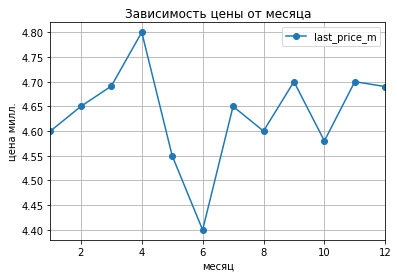

In [47]:
(
    df_l.pivot_table(index='month', values='last_price_m', aggfunc='median')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость цены от месяца')
plt.xlabel('месяц')
plt.ylabel('цена милл.')

На графике видно, что стоимость квартир сильно зависит от месяца: пик цен наблюдается в апреле, 
после чего идет резкое падение цен, и уже в июне они имеют минимальную цену. После этого начинается резкий рост до июля и постепенный до апреля следующего года

**Изучим зависимость от года**

Построим линейный график по годам

Text(0, 0.5, 'цена милл.')

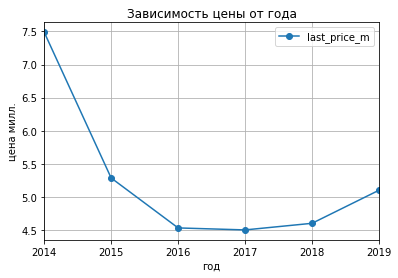

In [48]:
(
    df_l.pivot_table(index='year', values='last_price_m', aggfunc='median')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость цены от года')
plt.xlabel('год')
plt.ylabel('цена милл.')

Мы видим резкий обвал после 2014 года(скорее всего из за кризиса), который продлился вплоть до 2017 года, после чего начался положительный рост.

#### Изучим 10 населённых пунктов с наибольшим числом объявлений

Пириведем назвариня к нижнему регистру, для того чтоб убрать возможные дубликаты

In [49]:
df['locality_name'] = df['locality_name'].str.lower()

Произведем лемматизацию и стемминг и выведем города с наибольшим числом обьявлений 

In [50]:
from pymystem3 import Mystem
from collections import Counter
m = Mystem()
clean_name = df['locality_name'].fillna('неизвестно')

lemm = []
for row in clean_name:
    lemm += m.lemmatize(row)

from nltk.stem import SnowballStemmer
russian_stemmer = SnowballStemmer('russian')
stemmed_word = []
for query in lemm:
    for word in query.split():
        stemmed_word += [russian_stemmer.stem(word)]
Counter(stemmed_word).most_common(20)

[('санкт-петербург', 15721),
 ('поселок', 2660),
 ('деревн', 945),
 ('мурин', 590),
 ('городск', 550),
 ('кудров', 472),
 ('шушар', 440),
 ('всеволожск', 398),
 ('пушкин', 369),
 ('тип', 363),
 ('колпин', 338),
 ('парголов', 327),
 ('гатчин', 307),
 ('выборг', 237),
 ('сел', 210),
 ('петергоф', 201),
 ('красн', 190),
 ('нов', 187),
 ('сестрорецк', 183),
 ('девяткин', 144)]

Найдем населенные пункты и поместим их в переменную top10_list, далее заменим пропуски на "неизвестно" и создадим новую колонку с лемматезированным названием

In [51]:
top10_list = ['санкт-петербург', 'мурин', 'кудров', 'шушар', 'всеволожск', 'пушкин', 'колпин', 'парголов', 'гатчин', 'выборг']
# заменим пропуски методом fillna
df['locality_name'] = df['locality_name'].fillna('неизвестно')
# создадим функцию для которая возвращает лемматизированое имя
def rename(row):
    pur = row['locality_name']
    for i in top10_list:
        if i in pur:
                return i
# применим ее            
df['top10'] = df.apply(rename, axis=1)
# создадим переменную с населенными пунктами
top10 = df['top10'].value_counts().head(10)
top10           

санкт-петербург    15721
мурин                590
кудров               472
шушар                440
всеволожск           398
пушкин               369
колпин               338
парголов             327
гатчин               307
выборг               237
Name: top10, dtype: int64

Сгрупируем данные из таблицы по средней цене за квадратный метр

In [52]:
(
    df.query('top10.isin(@top10.index)') # делаем срез данных по индексам таблицы
    .pivot_table(index='top10', values='meter_price') # групируем по населенным пунктам и считаем среднее
    .sort_values(by='meter_price', ascending=False) # сортируем по убыванию
)

,meter_price
top10,
санкт-петербург,114849.005788
пушкин,103125.818428
кудров,95324.957627
парголов,90175.886850
мурин,86087.508475
шушар,78677.379545
колпин,75424.571006
гатчин,68746.110749
всеволожск,68654.474874


Мы видим что самый дорогой метр в Санкт-Петербурге, а самый дешевый в Выборге

#### Определим границы центра и изучим зависимость цен

Создадим переменную piter и поместим в нее данные из Санкт-Петербурга

In [53]:
piter = df.query('locality_name in "санкт-петербург"')

Добавим столбец с растоянием до центра в киллометрах

In [54]:
piter.loc[:,'nearest_km'] = round(df.loc[:,'cityCenters_nearest'] / 1000).astype('Int64')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Добавим график 

Text(0, 0.5, 'цена милл.')

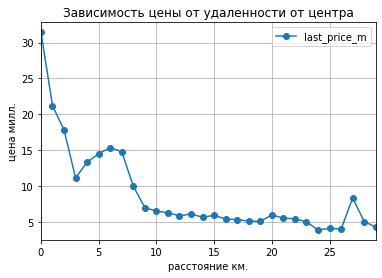

In [55]:
(
    piter.pivot_table(index='nearest_km', values='last_price_m', aggfunc='mean')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость цены от удаленности от центра')
plt.xlabel('расстояние км.')
plt.ylabel('цена милл.')

Мы видим резкий скачек между 0 и 5, это и есть граница центра. Приблизим график и найдем точное значение

Text(0, 0.5, 'цена милл.')

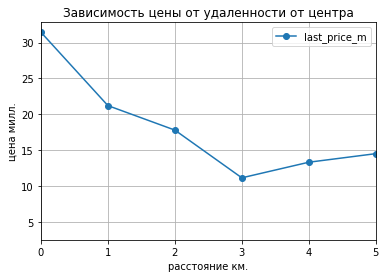

In [56]:
(
    piter.pivot_table(index='nearest_km', values='last_price_m', aggfunc='mean')
    .plot(grid=True, style='o-', xlim=(0, 5))
)
plt.title('Зависимость цены от удаленности от центра')
plt.xlabel('расстояние км.')
plt.ylabel('цена милл.')

По графику видно, что граница центра начинается с 3х киллометров

#### Выделим сигмент квартир в центре и проанализируем эту территорию

Создадим переменную piter_centr и поместим в нее данные о центральных квартирах

In [57]:
piter_centr = piter.query('nearest_km <= 3').copy()

##### Проанализируем территорию

Вызовем метод describe и построим гистограммы для площади, цены, комнат и потолков

Text(0, 0.5, 'Частота')

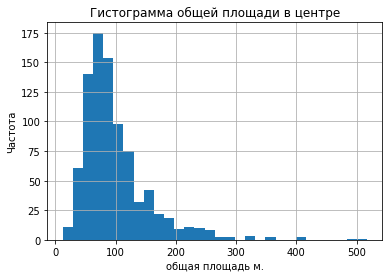

In [58]:
piter_centr['total_area'].hist(bins=30)
piter_centr['total_area'].describe()
plt.title('Гистограмма общей площади в центре')
plt.xlabel('общая площадь м.')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

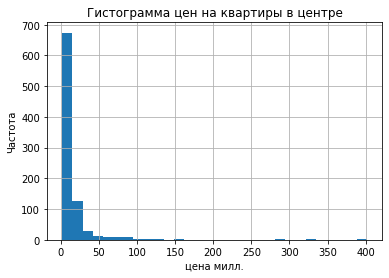

In [59]:
piter_centr['last_price_m'].hist(bins=30)
piter_centr['last_price_m'].describe()
plt.title('Гистограмма цен на квартиры в центре')
plt.xlabel('цена милл.')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

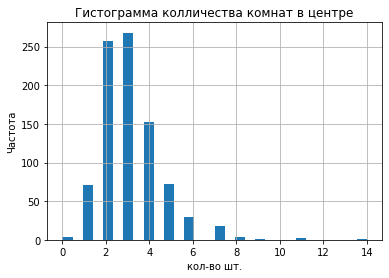

In [60]:
piter_centr['rooms'].hist(bins=30)
piter_centr['rooms'].describe()
plt.title('Гистограмма колличества комнат в центре')
plt.xlabel('кол-во шт.')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

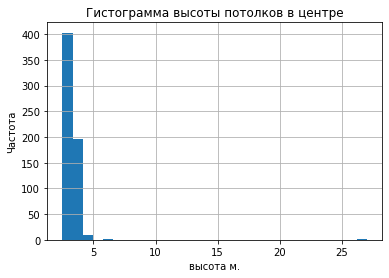

In [61]:
piter_centr['ceiling_height'].hist(bins=30)
piter_centr['ceiling_height'].describe()
plt.title('Гистограмма высоты потолков в центре')
plt.xlabel('высота м.')
plt.ylabel('Частота')

Из данных выше мы видим, что в центре возрасли все показатели:
* площадь квартир стала больше, медианное значение выросло с 52 до 85
* стоимость с 4.65 до 9.8 миллионов
* кол-во комнат имевшее моды в 1-2 комнаты сместились к 2-3
* высота потолков выросла с 2.65 до 3.2 метров

Text(0, 0.5, 'частота')

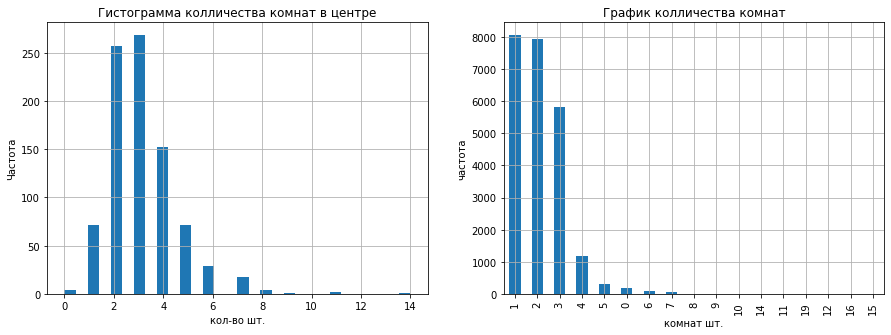

In [62]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

piter_centr['rooms'].hist(bins=30, ax=axes[0])

axes[0].set_title('Гистограмма колличества комнат в центре')
axes[0].set_xlabel('кол-во шт.')
axes[0].set_ylabel('Частота')

(
    df['rooms'].value_counts()
    .plot(grid=True, kind='bar', ax=axes[1])
)

axes[1].set_title('График колличества комнат')
axes[1].set_xlabel('комнат шт.')
axes[1].set_ylabel('частота')

##### Изучим факторы влияющие на стоимость квартиры

**Проверим зависит ли цена от площади**

In [63]:
pc_tl = piter_centr.query('12 < total_area < 200 and 1 < last_price_m < 40')

Text(0, 0.5, 'цена милл.')

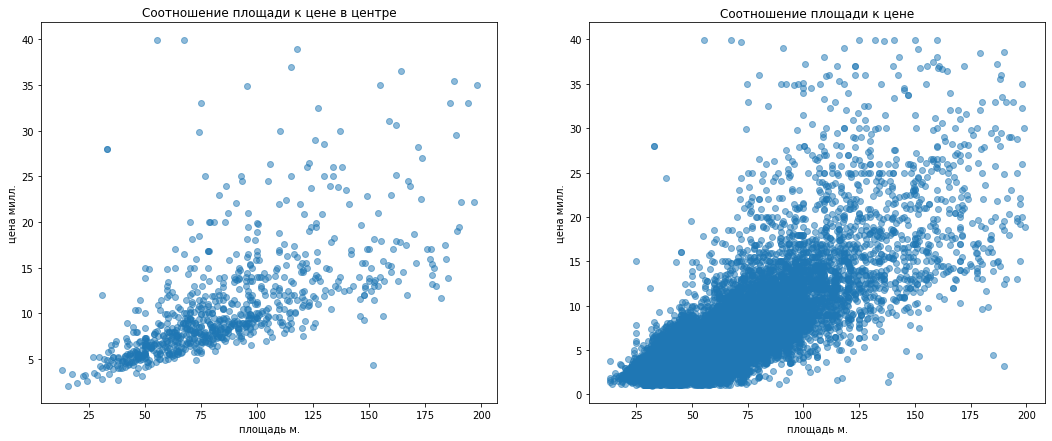

In [64]:
# Настройка размеров подложки
plt.figure(figsize=(18, 7))
# Вывод графиков
plt.subplot(1, 2, 2)
plt.plot(df_tl['total_area'], df_tl['last_price_m'], 'o', alpha=0.5)
plt.grid=True
plt.title('Соотношение площади к цене')
plt.xlabel('площадь м.')
plt.ylabel('цена милл.')
plt.subplot(1, 2, 1)
plt.plot(pc_tl['total_area'], pc_tl['last_price_m'], 'o', alpha=0.5)
plt.title('Соотношение площади к цене в центре')
plt.xlabel('площадь м.')
plt.ylabel('цена милл.')

In [65]:
pc_tl['total_area'].corr(pc_tl['last_price_m'])

0.623270016373908

Мы видим что зависимость цены от площади осталась, но стала ниже. А также, что в отличии от всей территории, квартиры до 5 миллионов в центре почти остсутствуют.

**Проверим зависит ли цена от кол-ва комнат**

In [66]:
pc_rl = piter_centr.query('rooms < 9 and 1 < last_price_m < 40')

Text(0, 0.5, 'цена милл.')

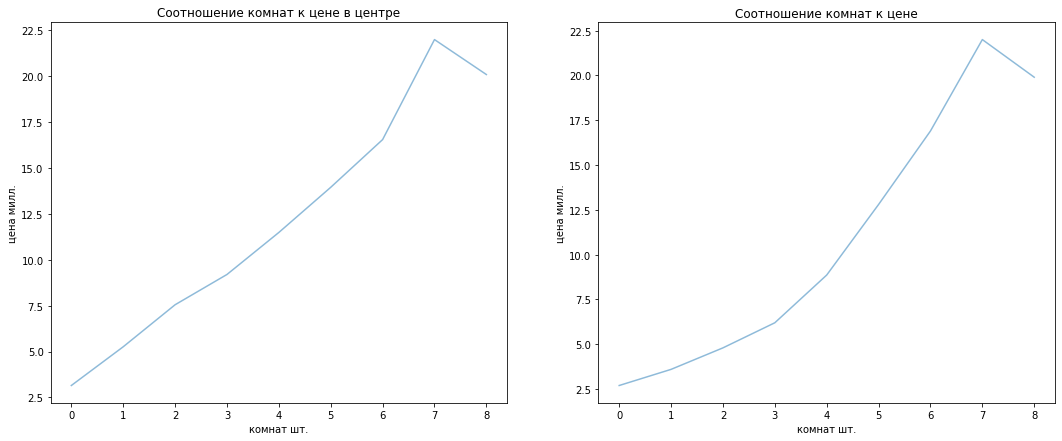

In [67]:
# Настройка размеров подложки
plt.figure(figsize=(18, 7))
# Вывод графиков
plt.subplot(1, 2, 2)
plt.plot(df_rl.pivot_table(index='rooms', values='last_price_m', aggfunc='median'), '-', alpha=0.5)
plt.title('Соотношение комнат к цене')
plt.xlabel('комнат шт.')
plt.ylabel('цена милл.')

plt.subplot(1, 2, 1)
plt.plot(pc_rl.pivot_table(index='rooms', values='last_price_m', aggfunc='median'), '-', alpha=0.5)
plt.title('Соотношение комнат к цене в центре')
plt.xlabel('комнат шт.')
plt.ylabel('цена милл.')


График с комнатами остался почти идентичным, с таким же странным провалом в стоимости 8ми комнатных квартир

**Проверим зависит ли цена от удаленности от центра**

In [68]:
pc_l = piter_centr.query('1 < last_price_m < 40')

Text(0, 0.5, 'цена милл.')

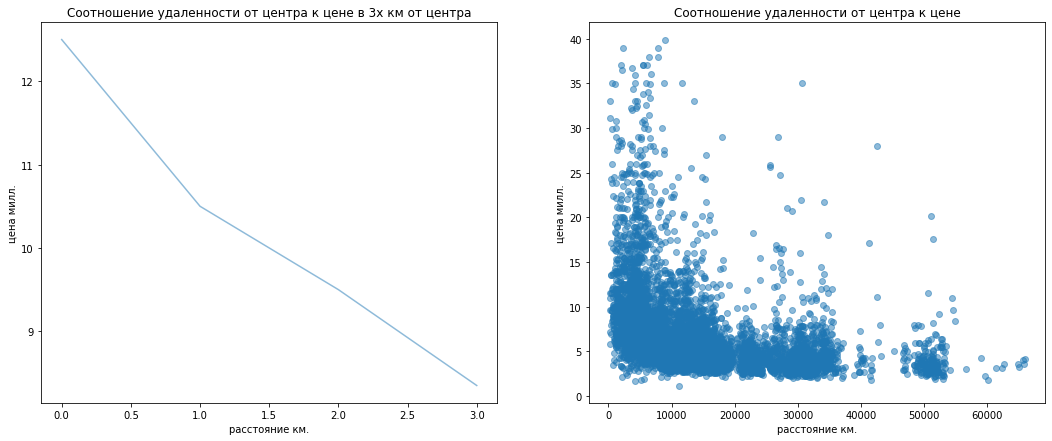

In [69]:
# Настройка размеров подложки
plt.figure(figsize=(18, 7))
# Вывод графиков
plt.subplot(1, 2, 2)
plt.plot(df_l.pivot_table(index='cityCenters_nearest', values='last_price_m', aggfunc='median'), 'o', alpha=0.5)
plt.title('Соотношение удаленности от центра к цене')
plt.xlabel('расстояние км.')
plt.ylabel('цена милл.')

plt.subplot(1, 2, 1)
plt.plot(pc_l.pivot_table(index='nearest_km', values='last_price_m', aggfunc='median'), '-', alpha=0.5)
plt.title('Соотношение удаленности от центра к цене в 3х км от центра')
plt.xlabel('расстояние км.')
plt.ylabel('цена милл.')

Мы видим сильную зависимость от приближения к центру, в котором квартиры стоят в среднем по 12 миллионов

**Проверим зависит ли цена от этажа**

Text(0, 0.5, 'цена милл.')

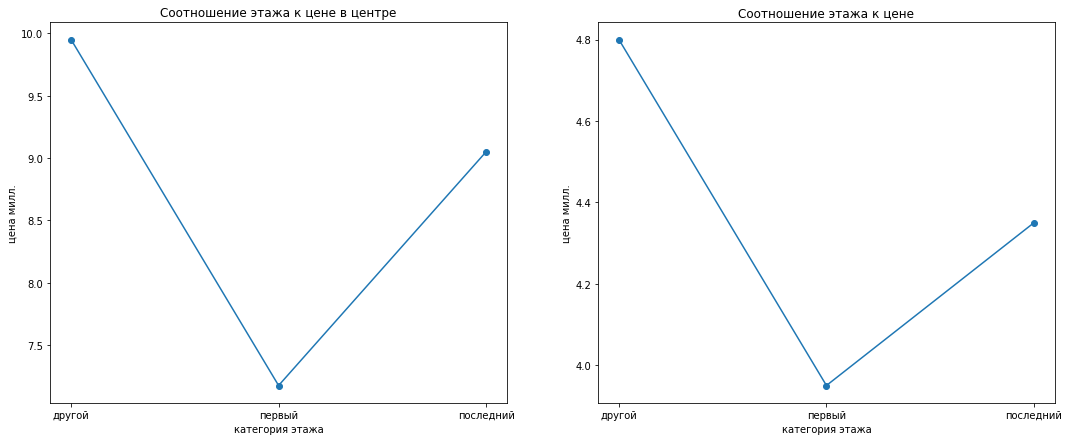

In [70]:
# Настройка размеров подложки
plt.figure(figsize=(18, 7))
# Вывод графиков
plt.subplot(1, 2, 2)
plt.plot(df_l.pivot_table(index='floor_category', values='last_price_m', aggfunc='median'), 'o-', alpha=1)
plt.title('Соотношение этажа к цене')
plt.xlabel('категория этажа')
plt.ylabel('цена милл.')

plt.subplot(1, 2, 1)
plt.plot(pc_l.pivot_table(index='floor_category', values='last_price_m', aggfunc='median'), 'o-', alpha=1)
plt.title('Соотношение этажа к цене в центре')
plt.xlabel('категория этажа')
plt.ylabel('цена милл.')

Тенденция осталась как и на всей территории, но раличия между этажами стали ярче.

### Вывод

В ходе исследователького анализа мы выяснили, что квартиры в центре в среднем имеют лучшие характеристики чем на остальной территории, но при этом и цена увеличивается за каждый киллометр к центру. А площадь, комнаты и этажи все так же влияют на цену. 

## Общий вывод

В ходе иследования мы предобработали данные, заполнив пропуски и заменив типы на подходящие для дальнейшей работы. Расчитали и добавили в таблицу данные для дальнейшего иследовательского анализа. Изучили данные о квартирах на всей территори и в центре города:
* Площадь квартир находится в значениях от 12 до 200 метров, но в центре города площадь квартир в среднем на 60 процентов больше 
* Цена квартир варьируется в значениях от 1 до 40 миллионов. 
* Основное колличество комнат находится в диапозоне до 9 комнат. В центре города имееются 2 основные моды в 2 и 3 квартиры, тогда как на всей территории моды в 1 и 2 комнаты
* Высота потолков находится в значениях от 2.5 метров до 4.5. Высота потолков в среднем по территории 2.65 м, а в центре города 3.2 метра

Мы сгрупировали города с самой дорогой ценой за квадратный метр - это Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово и Выборг.

Мы так же определили что основные продажи происходят от 3 до 500 дней, в данных имеются выбросы на значениях в 45 и 60 дней в природе которых нужно будет разобраться в будующем.

Цена растет от приближения к центру города, так: по все территории медианное значение 4,6 милл, в радиусе 3х киллометров от центра 9.8 милл, а в самом центре выше 12 миллионов. 

Также цена зависит:
* от колличества комнат и растет пропорционально с ним, за исключением квартир с 8 комнатами - они дешевле 7ми комнатных. 
* от этажа, самые дорогие квартиры посередине, затем идут квартиры на последнем этаже и самые дешевые на первом этаже. 
* зависимость цены от площади квартиры в центре города ниже чем на остальной территории. 
* Еще цена зависит от времени в которое выкладывают обьявления. Обьявления с самой дорогой ценой выкладывают в апреле, а с самой дешевой в июне, затем идет постпенный рост до следующего года. Также зависит от года. С 2014 по 2017 годы было резкое падение цен, скорее всего вызваное кризисом, после чего начался постепенный рост.

Получив данные параметры, можно построить автоматезированую систему для отслеживания аномалий и мошенников.